In [1]:
import numpy as np
import pandas as pd 

import torch 
import torch.nn as nn
import torchvision.transforms as transforms


In [2]:
# Load Model
from models import LFA, LPCLIP

pretrained_model_paths = {
    'LFA': {
        'DomainNet': '/output_dir/09052001-LFA-DomainNet-test/c905b5c26a9dbed4757ecda580358c38/IID_best.pkl',
    },
    'LPCLIP': [
        {
            'DomainNet': '/output_dir/09101000-LPCLIP-0-DomainNet-find/fb71e0d13dcd8d9452434dd121f21bda/IID_best.pkl',
        },
        {
            'DomainNet': '/output_dir/09101000-LPCLIP-1-DomainNet-find/e4b41de2ba07c6fc5afd23ee8fa85493/model.pkl',
        },
        {
            'DomainNet': '/output_dir/09101000-LPCLIP-2-DomainNet-find/8e925806d362268eeb16d07951b86475/model.pkl',
        },
        {
            'DomainNet': '/output_dir/09101000-LPCLIP-3-DomainNet-find/f77c4aec4fcb154f873b29c62a1f2305/model.pkl',
        },
        {
            'DomainNet': '/output_dir/09101000-LPCLIP-4-DomainNet-find/0366533dc085ae8a4d6583ba6648a912/model.pkl',
        },
        {
            'DomainNet': '/output_dir/09101000-LPCLIP-5-DomainNet-find/1a199b917f3593846360dabb8e7e0aa0/model.pkl',
        },
        {
            'DomainNet': '/output_dir/09101000-LPCLIP-6-DomainNet-find/622b77b3f007fed040001622418ca238/model.pkl',
        },
        {
            'DomainNet': '/output_dir/09101000-LPCLIP-7-DomainNet-find/d45334d363b54ad8244765f367320248/model.pkl',
        },
        {
            'DomainNet': '/output_dir/09101000-LPCLIP-8-DomainNet-find/1ba11433e2cc6a929e3282923352e8cc/model.pkl',
        },
        {
            'DomainNet': '/output_dir/09101000-LPCLIP-9-DomainNet-find/3f3228c060978273b6d8d2d16a9a5ab5/model.pkl',
        },
        {
            'DomainNet': '/output_dir/09101000-LPCLIP-10-DomainNet-find/bd4cad1393127cf4a2035fa8870cf1bb/model.pkl',
        },
        {
            # 'DomainNet': '/output_dir/09101000-LPCLIP-11-DomainNet-test/89fb58b001b9ac3666ce2b2ec03dacbc/model.pkl',
            'DomainNet': '/output_dir/09101000-LPCLIP-11-DomainNet-find/594c229eeefe122b5057bbab07482055/model.pkl',
        },
    ]
    
}

In [3]:
# with open(pretrained_model_paths['LFA']['DomainNet'], 'rb') as f:
#     data = torch.load(f)
#     hparams = data['model_hparams']
#     hparams['use_last_layer'] = False
#     lfa = LFA(hparams=hparams)
#     lfa.load_state_dict(data['model_dict'], strict=False)
#     lfa.eval()
#     lfa.cuda()
# print('='*50)
# print("LFA Model Loaded")
# print('='*50)

# with open(pretrained_model_paths['LFA']['DomainNet'], 'rb') as f:
#     data = torch.load(f)
#     hparams = data['model_hparams']
#     hparams['use_last_layer'] = True
#     lfa_last = LFA(hparams=hparams)
#     lfa_last.load_state_dict(data['model_dict'], strict=False)
#     lfa_last.eval()
#     lfa_last.cuda()
# print('='*50)
# print("LFA_Last Model Loaded")
# print('='*50)

lpclip = []
for i in range(12):
    with open(pretrained_model_paths['LPCLIP'][i]['DomainNet'], 'rb') as f:
        data = torch.load(f)
        hparams = data['model_hparams']
        hparams['use_last_layer'] = True
        _lpclip = LPCLIP(hparams=hparams)
        _lpclip.load_state_dict(data['model_dict'], strict=False)
        _lpclip.eval()
        _lpclip.cuda()
    lpclip.append(_lpclip)
    print('='*50)
    print(f"LPCLIP{i} Model Loaded")
    print('='*50)

/tmp/ipykernel_3599244/1318441552.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(f)



rank is None 

Set self.clip_model.parameters.reguires_grad = False!
image_projection.origin will be updated.
text_projection.origin will be updated.
# of Learnable Parameters: 655360
Max Memory Allocated: 1485566976
LPCLIP0 Model Loaded

rank is None 

Set self.clip_model.parameters.reguires_grad = False!
image_projection.origin will be updated.
text_projection.origin will be updated.
# of Learnable Parameters: 655360
Max Memory Allocated: 2091064832
LPCLIP1 Model Loaded

rank is None 

Set self.clip_model.parameters.reguires_grad = False!
image_projection.origin will be updated.
text_projection.origin will be updated.
# of Learnable Parameters: 655360
Max Memory Allocated: 2694903296
LPCLIP2 Model Loaded

rank is None 

Set self.clip_model.parameters.reguires_grad = False!
image_projection.origin will be updated.
text_projection.origin will be updated.
# of Learnable Parameters: 655360
Max Memory Allocated: 3299624960
LPCLIP3 Model Loaded

rank is None 

Set self.clip_model.paramete

In [7]:
import pickle

with open('errorcases_lpclip_per_layers.pkl', 'rb') as f:
    errorcases = pickle.load(f)

In [ ]:
import os
import PIL.Image as Image

# Load PACS Data
data_dir = '/data/domain_net'
domains = os.listdir(data_dir)
class_names = sorted(os.listdir(os.path.join(data_dir, 'real')))
idx2cls = {i: cls for i, cls in enumerate(class_names)}
errorcases = {
    # 'LFA': {d: [] for d in domains},
    'LPCLIP': [{d: [] for d in domains} for _ in range(12)],
}
targets = []

softmax = nn.Softmax(dim=1)
transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

for domain in domains:
    if domain != 'real': continue
    # print(f"Domain: {domain}")
    for cls_name in class_names:
        # print(f"Class: {cls_name}")
        seen_cnt = 0
        for img_name in os.listdir(os.path.join(data_dir, domain, cls_name)):
            if img_name.endswith('.pkl'):
                continue
            seen_cnt += 1
            if seen_cnt > 5:
                break
            print(f"Domain: {domain}, Class: {cls_name}, {seen_cnt:03d}/20\t", end='')
            
            img_path = os.path.join(data_dir, domain, cls_name, img_name)
            img = Image.open(img_path).convert('RGB')
            img = transform(img)
            img = img.float().cuda().unsqueeze(0)
            with torch.no_grad():
                # lfa_out, img_self_attn_prob, txt_self_attn_prob, txt_cross_attn_prob = lfa.predict(img, [img_path])
                # lpclip_out = lpclip[0].predict(img, [img_path])
                lpclip_out = [lpclip[i].predict(img, [img_path]) for i in range(12)]
                # lfa_last_out, last_img_self_attn_prob, last_txt_self_attn_prob, last_txt_cross_attn_prob = lfa_last.predict(img, [img_path])
            # lfa_pred = lfa_out.argmax(dim=1).item()
            lpclip_pred = [lpclip_out[i].argmax(dim=1).item() for i in range(12)]
            # lfa_last_pred = lfa_last_out.argmax(dim=1).item()
            # if idx2cls[lfa_pred] != cls_name:
            #     errorcases['LFA'][domain].append((img_path, lfa_out[0].tolist(), idx2cls[lfa_pred], cls_name))
            # if idx2cls[lpclip_pred] != cls_name:
            #     errorcases['LPCLIP'][domain].append((img_path, lpclip_out[0].tolist(), idx2cls[lpclip_pred], cls_name))
            for i in range(12):
                if idx2cls[lpclip_pred[i]] != cls_name:
                    errorcases['LPCLIP'][i][domain].append((img_path, lpclip_out[i].tolist(), idx2cls[lpclip_pred[i]], cls_name))
                    print(0, end='')
                else:
                    print(1, end='')
            # if idx2cls[lpclip_pred[11]] != cls_name:
                
            # if idx2cls[lfa_last_pred] != cls_name and idx2cls[lfa_pred] == cls_name and idx2cls[lpclip_pred] != cls_name:
            #     targets.append((
            #         img_path, 
            #         last_img_self_attn_prob[0].tolist(), 
            #         last_txt_self_attn_prob.tolist(), 
            #         last_txt_cross_attn_prob[0].tolist(),
            #         softmax(lfa_last_out)[0].tolist(), idx2cls[lfa_last_pred],
            #         img_self_attn_prob[0].tolist(), 
            #         txt_self_attn_prob.tolist(), 
            #         txt_cross_attn_prob[0].tolist(),
            #         softmax(lfa_out)[0].tolist(), idx2cls[lfa_pred],
            #         softmax(lpclip_out)[0].tolist(), idx2cls[lpclip_pred]))
            print()

In [5]:
len(domains), len(class_names)*5

(6, 1725)

In [21]:
sum(len(os.listdir(data_dir+'/real'+'/'+x)) for x in os.listdir(data_dir+'/real'))

172947

[1686, 1685, 1651, 1616, 1538, 1477, 1442, 1323, 1212, 780, 370, 179]


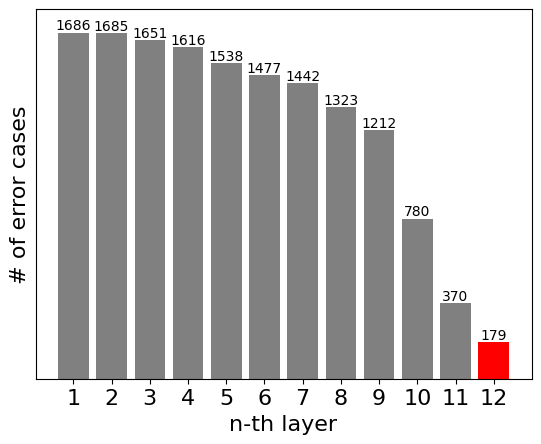

In [43]:
from matplotlib import pyplot as plt
import os
import PIL.Image as Image

# Load PACS Data
data_dir = 'data/domain_net'
domains = os.listdir(data_dir)
class_names = sorted(os.listdir(os.path.join(data_dir, 'real')))
idx2cls = {i: cls for i, cls in enumerate(class_names)}

err_len = [len(errorcases['LPCLIP'][i]['real']) for i in range(12)]
print(err_len)
plt.bar(range(1,13), err_len, color=['gray']*11+['red'])
plt.xlabel('n-th layer', fontsize=16)
plt.xticks(range(1,13), fontsize=16)
plt.yticks([], fontsize=16)
plt.ylim(0, 1800)
# plt.title("Error Cases When Using Only Each Layer", fontsize=16)
plt.ylabel('# of error cases', fontsize=16)
# add value on top of each bar
for i, v in enumerate(err_len):
    plt.text(i+1, v, str(v), ha='center', va='bottom', fontsize=10)

In [ ]:
import pandas as pd

# errorcase on 12 layer but not on i layer
# errorcases['LPCLIP'][11]['real'][0][3]
df = [pd.DataFrame(errorcases['LPCLIP'][i]['real'], columns=['img_path', 'pred', 'pred_cls', 'true_cls']).drop(['pred'], axis=1) for i in range(12)]
df[0].head()

# merge all dataframes
df_merge = df[0].copy()
for i in range(11):
    df_merge = pd.merge(df_merge, df[i+1], on='img_path', how='outer', suffixes=(f'_{i}', f'_{i+1}'))
df_merge = df_merge[['img_path', 'true_cls_11'] + [f'pred_cls_{i}' for i in range(12)]]
df_merge

In [ ]:
df_err11 = df_merge.dropna(subset=['pred_cls_11'])
df_err11 = df_err11.apply(lambda x: x.fillna(x['true_cls_11']), axis=1)
display(df_err11)

correct_len = [df_err11.apply(lambda x: x['true_cls_11'] == x['pred_cls_'+str(i)], axis=1).sum() for i in range(11)]
print(correct_len)
plt.bar(range(1,12), correct_len, color='green')
plt.xlabel('n-th layer', fontsize=16)
plt.xticks(range(1,12), fontsize=16)
plt.yticks([], fontsize=16)
plt.ylim(0, 50)
# plt.title("Correct Case Count in Other Layers for Error Cases in the 12th Layer", fontsize=16)
plt.ylabel('# of correct cases', fontsize=16)
# add value on top of each bar
for i, v in enumerate(correct_len):
    plt.text(i+1, v, str(v), ha='center', va='bottom', fontsize=10)

In [11]:
import pickle

with open('errorcases_lpclip_per_layers.pkl', 'wb') as f:
    pickle.dump(errorcases, f)

In [3]:
import pickle

with open('errorcases_lpclip_per_layers.pkl', 'rb') as f:
    errorcases = pickle.load(f)

In [ ]:
# get value
cls2idx = {cls: i for i, cls in idx2cls.items()}
for path, last_img_self_attn_prob, last_txt_self_attn_prob, last_txt_cross_attn_prob, lfa_last_prob, lfa_last_pred, \
    img_self_attn_prob, txt_self_attn_prob, txt_cross_attn_prob, lfa_prob, lfa_pred, \
    lpclip_prob, lpclip_pred in targets:
    print(f"Path: {path}")
    print(f"Last Image Self-Attention: {np.round(last_img_self_attn_prob, 2)}")
    print(f"Last Text Self-Attention: {np.round(last_txt_self_attn_prob[cls2idx[lfa_last_pred]], 2)}")
    print(f"Last Text Cross-Attention: {np.round(last_txt_cross_attn_prob[cls2idx[lfa_last_pred]], 2)}")
    print(f"LFA Last Prob: {np.round(lfa_last_prob, 2)}")
    print(f"LFA Last Pred: {lfa_last_pred}")
    print(f"Image Self-Attention: {np.round(img_self_attn_prob, 2)}")
    print(f"Text Self-Attention: {np.round(txt_self_attn_prob[cls2idx[lfa_pred]], 2)}")
    print(f"Text Cross-Attention: {np.round(txt_cross_attn_prob[cls2idx[lfa_pred]], 2)}")
    print(f"LFA Prob: {np.round(lfa_prob, 2)}")
    print(f"LFA Pred: {lfa_pred}")
    print(f"LPCLIP Prob: {np.round(lpclip_prob, 2)}")
    print(f"LPCLIP Pred: {lpclip_pred}")
    print('='*50)

In [ ]:
torch.tensor([[0]*11+[1.]]*7)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
for domain in domains:
    for path, out, pred, gt in errorcases['LFA'][domain]:
        if path in targets:
            print(f"Domain: {domain}")
            print(f"Path: {path}")
            print(f"Out: {out}")
            print(f"Pred: {pred}")
            print(f"GT: {gt}")
            print('='*50)

In [ ]:
errorcases['LPCLIP']